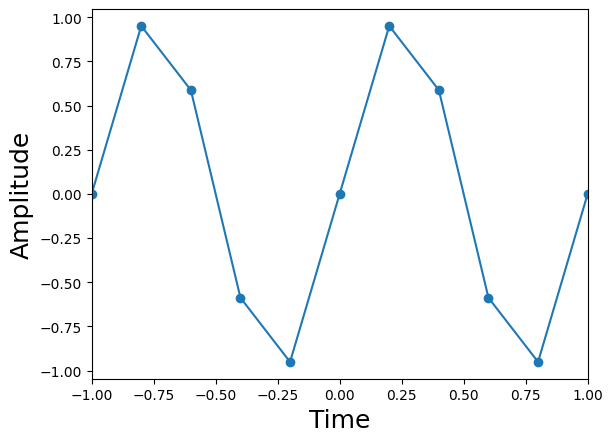

In [53]:
from __future__ import division
import matplotlib.pyplot as plt  # Import for plotting
import numpy as np  # Import for mathematical operations

# Create the figure and axis
fig, ax = plt.subplots()

# Define the signal frequency and sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate (fs >= 2 * f)

# Check for Nyquist criterion (optional but recommended)
if fs < 2 * f:
    raise ValueError("Sampling rate fs must be at least twice the signal frequency f (Nyquist criterion).")

# Generate the sample interval, symmetric for convenience
t = np.arange(-1, 1 + 1/fs, 1/fs)  # Time vector for sampling

# Generate the signal
x = np.sin(2 * np.pi * f * t)  # Signal in time domain

# Plot the signal
ax.plot(t, x, 'o-')  # Use standard ASCII quotes

# Label the plot
ax.set_xlabel('Time', fontsize=18)  # Correct quotes for label
ax.set_ylabel('Amplitude', fontsize=18)

# Display the plot
plt.xlim(-1,1)
plt.show()

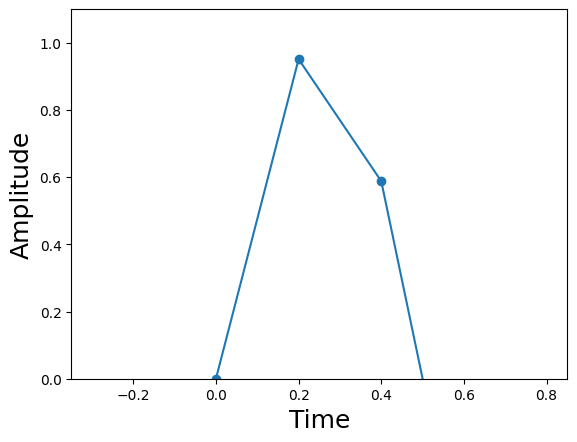

In [54]:
fig, ax = plt.subplots()  # Create a figure and axis for plotting
ax.plot(t, x, 'o-')  # Plot the signal with circle markers and lines connecting them

# Set the limits for the axes
ax.axis([1/(4*f) - 1/fs*3, 1/(4*f) + 1/fs*3, 0, 1.1])  # Setting x and y limits, ax.axis([...]): This method sets the limits of the axes in the format [xmin, xmax, ymin, ymax]

# Label the axes
ax.set_xlabel('Time', fontsize=18)  # Label for x-axis
ax.set_ylabel('Amplitude', fontsize=18)  # Label for y-axis

# Show the plot
plt.show()

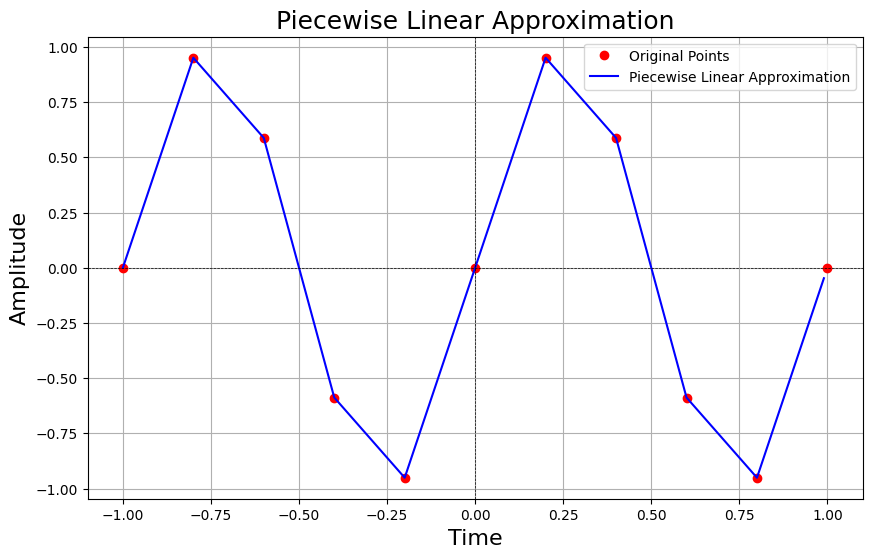

In [55]:
# Sample time points and corresponding values (for example)

# Initialize lists for piecewise domains and approximations
interval = []  # piecewise domains
apprx = []     # line on domains

# Build up points *evenly* inside of intervals
tp = np.hstack([np.linspace(t[i], t[i + 1], 20, endpoint=False) for i in range(len(t) - 1)])

# Construct arguments for piecewise
for i in range(len(t) - 1):
    interval.append(np.logical_and(t[i] <= tp, tp < t[i + 1]))  # Check which tp values fall in the current interval
    apprx.append((x[i + 1] - x[i]) / (t[i + 1] - t[i]) * (tp[interval[-1]] - t[i]) + x[i])  # Linear interpolation

# Use np.piecewise to create the piecewise linear approximation
x_hat = np.piecewise(tp, interval, apprx)  # Piecewise linear approximation
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot original points
plt.plot(t, x, 'ro', label='Original Points')  # Red dots for original points

# Plot piecewise linear approximation
plt.plot(tp, x_hat, 'b-', label='Piecewise Linear Approximation')  # Blue line for approximation

# Adding labels and title
plt.title('Piecewise Linear Approximation', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.axhline(0, color='black', lw=0.5, ls='--')  # Horizontal line at y=0
plt.axvline(0, color='black', lw=0.5, ls='--')  # Vertical line at x=0
plt.legend()
plt.grid()
plt.show()

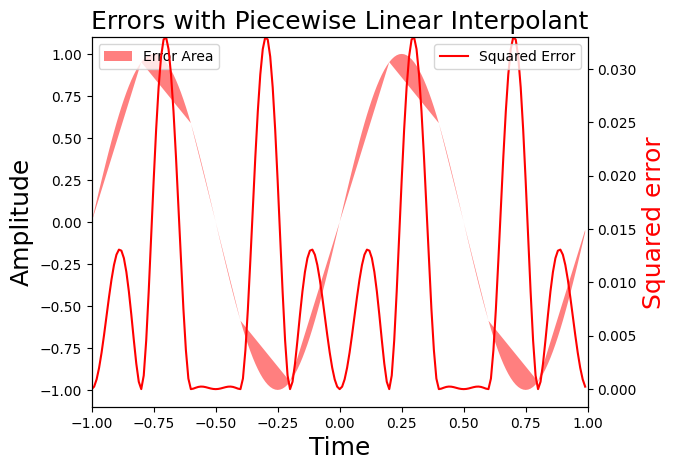

In [56]:
# Create a new figure and axes
fig, ax1 = plt.subplots()

# Fill in the difference between the interpolant and the sine wave
ax1.fill_between(tp, x_hat, np.sin(2 * np.pi * f * tp), facecolor="red", alpha=0.5, label='Error Area')
ax1.set_xlabel('Time', fontsize=18)
ax1.set_ylabel('Amplitude', fontsize=18)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()  # create clone of ax1

# Compute the squared error
sqe = (x_hat - np.sin(2 * np.pi * f * tp))**2  # Squared error between approximation and actual sine wave

# Plot the squared error
ax2.plot(tp, sqe, 'r', label='Squared Error')  # Plot squared error in red
ax2.axis(xmin=-1, xmax=1, ymax=sqe.max())  # Set x-axis limits and adjust y-axis to maximum squared error
ax2.set_ylabel('Squared error', color='r', fontsize=18)

# Set the title for the plot
ax1.set_title('Errors with Piecewise Linear Interpolant', fontsize=18)

# Show legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot

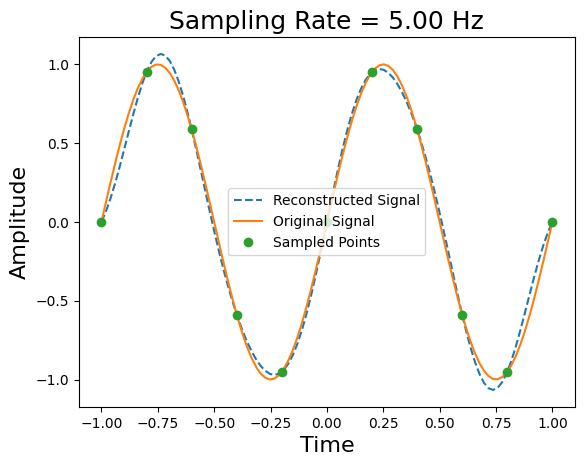

In [57]:
# Define the sampling rate
fs = 5.00  # Sampling rate in Hz

# Create the figure and axis
fig, ax = plt.subplots()

# Define time vectors
t = np.linspace(-1, 1, 100)  # Fine-grained time vector for smooth plot
ts = np.arange(-1, 1 + 1/fs, 1/fs)  # Sample points based on sampling rate

# Number of sinc coefficients based on the number of sampled points
num_coeffs = len(ts)

# Initialize the summation (reconstructed signal)
sm = 0  # Make sure it's a vector of zeros with the same shape as t

# Loop for sinc interpolation
for k in range(num_coeffs):
    sm += np.sin(2 * np.pi * (k / fs)) * np.sinc((t - ts[k]) * fs)

# Plot the reconstructed signal, original signal, and sampled points
ax.plot(t, sm, '--', label='Reconstructed Signal')  # Dashed line for sinc interpolated signal
ax.plot(t, np.sin(2 * np.pi * t), label='Original Signal')  # Solid line for original signal
ax.plot(ts, np.sin(2 * np.pi * ts), 'o', label='Sampled Points')  # Sample points as red dots

# Set the plot title and labels
ax.set_title('Sampling Rate = %3.2f Hz' % fs, fontsize=18)
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)

# Add legend
ax.legend()

# Show the plot
plt.show()


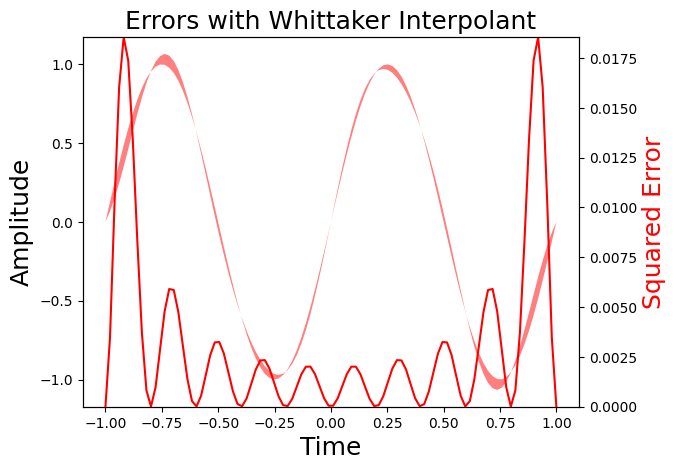

In [58]:
# Define the sampling rate and frequency
fs = 5.00  # Sampling rate in Hz
f = 1.00   # Frequency of the sine wave

# Create the figure and axis
fig, ax1 = plt.subplots()

# Define time vector

# Number of sinc coefficients based on the number of sampled points
num_coeffs = len(ts)

# Initialize the summation (reconstructed signal)
sm = np.zeros_like(t)  # Initialize reconstructed signal

# Loop for sinc interpolation
for k in range(num_coeffs):
    sm += np.sin(2 * np.pi * (k / fs)) * np.sinc((t - ts[k]) * fs)

# Fill between original sine and reconstructed signal
ax1.fill_between(t, sm, np.sin(2 * np.pi * f * t), facecolor='red', alpha=0.5)

# Labels for amplitude
ax1.set_ylabel('Amplitude', fontsize=18)
ax1.set_xlabel('Time', fontsize=18)

# Create a second y-axis to plot squared error
ax2 = ax1.twinx()

# Compute squared error between original signal and reconstructed signal
sqe = (sm - np.sin(2 * np.pi * f * t))**2

# Plot squared error on the secondary axis
ax2.plot(t, sqe, 'r', label='Squared Error')

# Set axis limits for the squared error
ax2.set_ylim(0, sqe.max())

# Labels for squared error
ax2.set_ylabel('Squared Error', color='r', fontsize=18)

# Set plot title
ax1.set_title(r'Errors with Whittaker Interpolant', fontsize=18)

# Show the plot
plt.show()

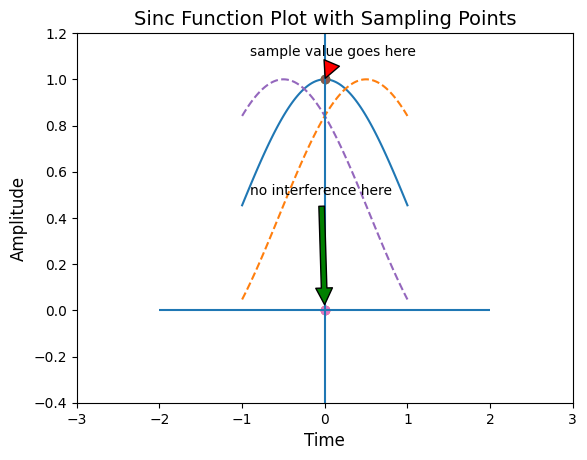

In [65]:
fig, ax = plt.subplots()
# Define k as the center of the sinc function and the sampling rate fs
k = 0  # Center position for the sinc function
fs = 2  # Sampling frequency in Hz

# Plot the sinc functions shifted around the sample points
ax.plot(t,sinc(k - fs * t),
        t,sinc(k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o', 
        t,sinc(k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o' )

# Add horizontal and vertical reference lines
ax.hlines(0, -2, 2 )  # Horizontal line at y=0
ax.vlines(0, -0.5, 1.2 )  # Vertical line at x=0 (extends up to 1.2 for better clarity)

# Annotate the plot to highlight sample values and interference regions
ax.annotate('sample value goes here', xy=(0,1), xytext=(-1+0.1,1.1), arrowprops={'facecolor':'red', 'shrink':0.05},)

ax.annotate('no interference here', xy=(0,0), xytext=(-1+0.1,0.5), arrowprops={'facecolor':'green','shrink':0.05},)

# Add labels and title
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.set_title('Sinc Function Plot with Sampling Points', fontsize=14)

# Set the axis limits to match your image's view
ax.set_xlim([-3, 3])
ax.set_ylim([-0.4, 1.2])

# Show the plot
plt.show()

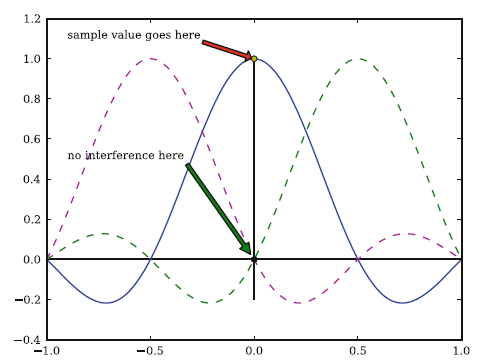

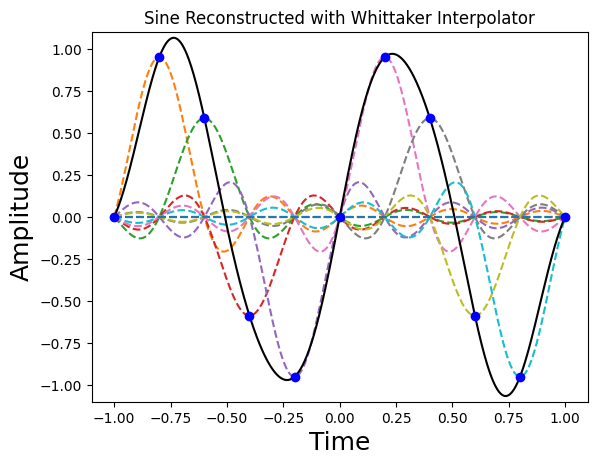

In [80]:
# Define the time and sampling parameters
fs = 5.0  # Sampling rate (Hz)
t = np.linspace(-1, 1, 1000)  # Time vector for plotting from -1 to 1 with 1000 points

# Generate integer sampling coefficients based on the sampling rate
k = np.array(sorted(set((t * fs).astype(int))))  # Unique and sorted coefficients list

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the individual Whittaker functions (sinc functions)
for i in range(len(k)):
    ax.plot(t, (np.sin(2 * np.pi * (k[i] / fs)) * np.sinc(k[i] - fs * t)), '--')

# Sum the Whittaker functions to generate the interpolant
whittaker_sum = np.sum(np.sin(2 * np.pi * (k[:, None] / fs)) * np.sinc(k[:, None] - fs * t), axis=0)
ax.plot(t, whittaker_sum, 'k-', label='Whittaker Interpolant')  # Whittaker interpolant in solid black

# Plot the sampled sine points
ax.plot(k / fs, np.sin(2 * np.pi * k / fs), 'ob', label='Sampled Points')  # Samples as blue circles

# Add labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')

# Set axis limits to match the sine wave and sampling rate
ax.axis((-1.1, 1.1, -1.1, 1.1))

# Show the plot
plt.show()


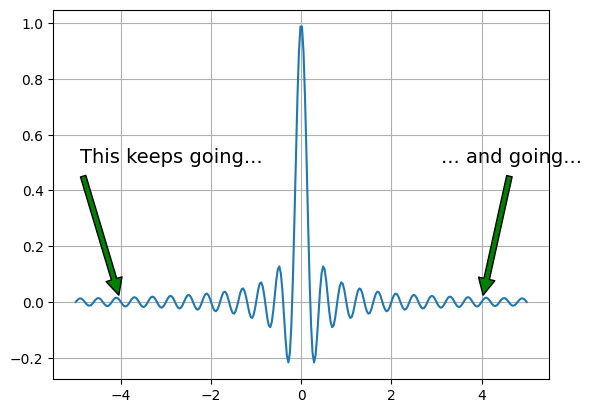

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time variable t over a range [-5, 5] with 300 points
t = np.linspace(-5, 5, 300) 

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Sampling rate, fs = 5.0
fs = 5.0 

# Plot the sinc function, scaled by the sampling rate
ax.plot(t, np.sinc(fs * t))

# Add a grid to the plot to aid visualization
ax.grid()

# Annotate the left side of the sinc function, indicating it continues indefinitely
ax.annotate('This keeps going...',
            xy=(-4, 0),             # Position of the arrowhead
            xytext=(-5 + .1, 0.5),  # Position of the annotation text
            arrowprops={'facecolor': 'green', 'shrink': 0.05},  # Arrow style
            fontsize=14)            # Font size of the annotation text

# Annotate the right side of the sinc function, also indicating continuation
ax.annotate('... and going...',
            xy=(4, 0),              # Position of the arrowhead
            xytext=(3 + .1, 0.5),   # Position of the annotation text
            arrowprops={'facecolor': 'green', 'shrink': 0.05},  # Arrow style
            fontsize=14)            # Font size of the annotation text

# Display the plot
plt.show()